In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [4]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_data.shape

(200, 5)

In [6]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#We use Annual Income and Spending Score, because they help identify customer patterns.
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]


In [10]:
#K-Means works better when data is scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


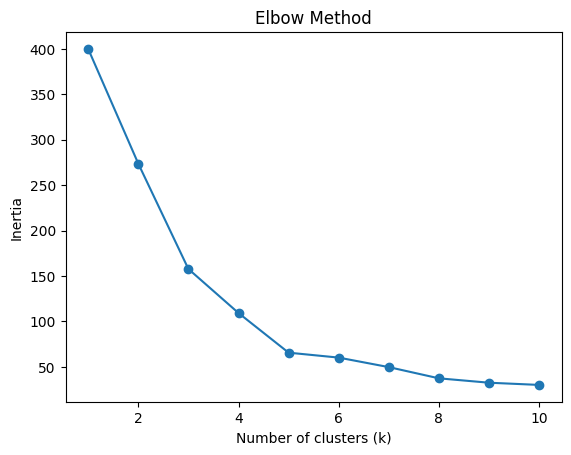

In [11]:
#Find Optimal Number of Clusters (Elbow Method)
inertia = []  

for k in range(1, 11):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [13]:
# The elbow method shows a clear bend at k=5, indicating 5 is an optimal number of clusters.
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)
customer_data['Cluster'] = clusters

In [14]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


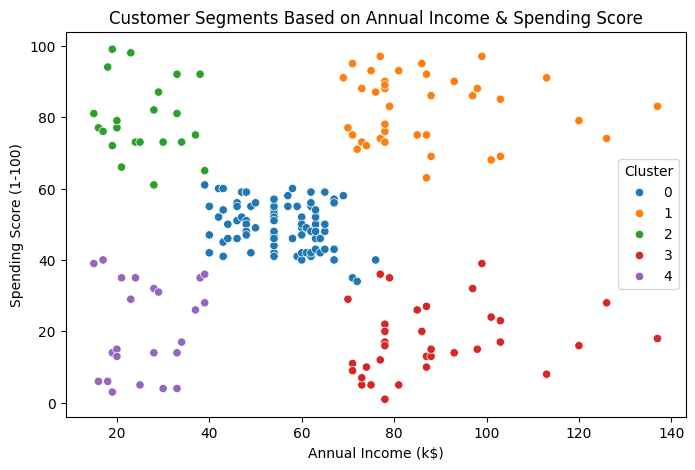

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=customer_data['Annual Income (k$)'], 
                y=customer_data['Spending Score (1-100)'], 
                hue=customer_data['Cluster'], 
                palette='tab10')
plt.title('Customer Segments Based on Annual Income & Spending Score')
plt.show()


In [17]:
# Save the clustered data to a CSV file
customer_data.to_csv("customer_segments.csv", index=False)